In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt
from pprint import pprint
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error, accuracy_score
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_feather("/home/oskar-kiss/repos/antartic bacteria/clean_data.feather")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91852 entries, 0 to 91854
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   sample_id          91852 non-null  category       
 1   field_season       91852 non-null  category       
 2   lake               91852 non-null  category       
 3   limno_run          91852 non-null  category       
 4   date               91852 non-null  datetime64[ns] 
 5   elapsed_days       91852 non-null  timedelta64[ns]
 6   depth              91852 non-null  float64        
 7   green_algae        91852 non-null  float64        
 8   cyanobacteria      91852 non-null  float64        
 9   brown/mixed_algae  91852 non-null  float64        
 10  cryptophytes       91852 non-null  float64        
 11  yellow_substances  91852 non-null  float64        
 12  total_chlorophyll  91852 non-null  float64        
dtypes: category(4), datetime64[ns](1), float64(7), time

(0.0, 100.0)

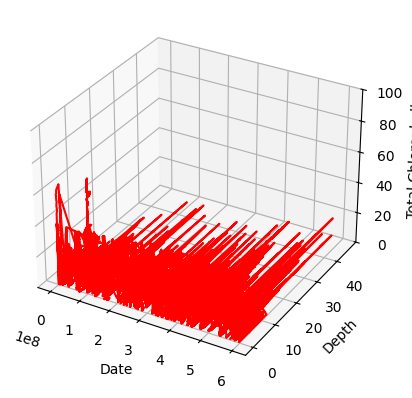

In [4]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot3D(df["elapsed_days"].dt.total_seconds(), df["total_chlorophyll"], df["depth"], color="red")
ax.set_xlabel("Date")
ax.set_ylabel("Depth")
ax.set_zlabel("Total Chlorophyll")

ax.set_zlim(0, 100)


<Axes: xlabel='depth', ylabel='total_chlorophyll'>

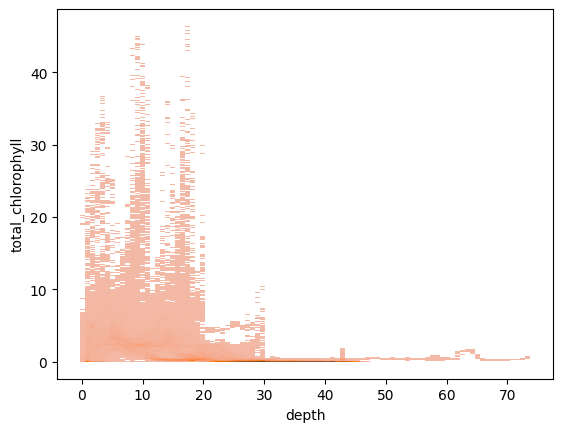

In [5]:
sns.histplot(df, x="depth", y="total_chlorophyll", color="tab:orange")

In [6]:
df.columns

Index(['sample_id', 'field_season', 'lake', 'limno_run', 'date',
       'elapsed_days', 'depth', 'green_algae', 'cyanobacteria',
       'brown/mixed_algae', 'cryptophytes', 'yellow_substances',
       'total_chlorophyll'],
      dtype='object')

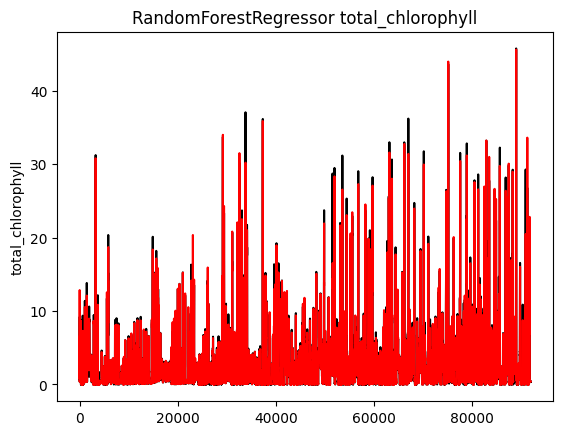

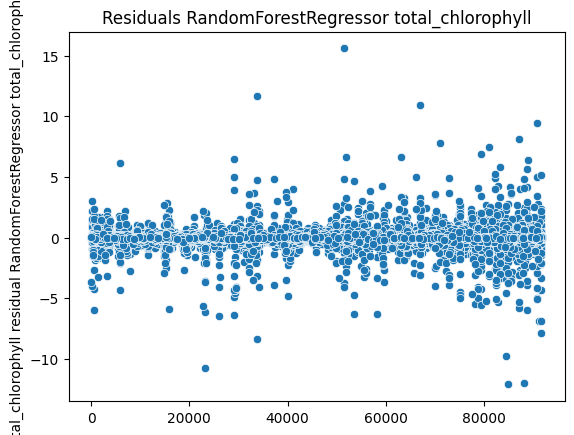

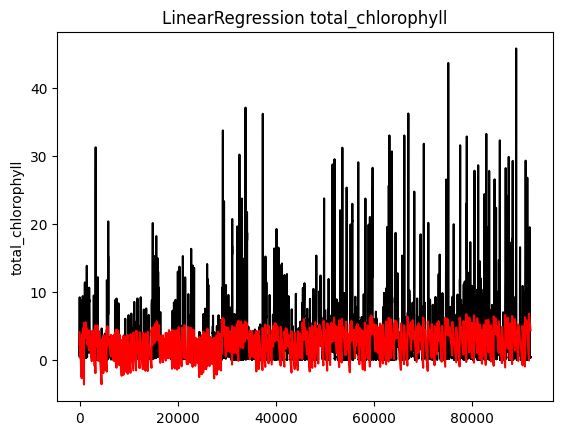

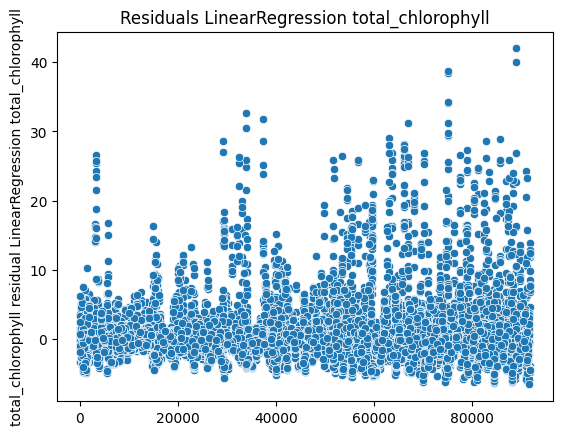

In [26]:
metrics = {}

for model in [RandomForestRegressor, LinearRegression]:
    for feat in ["total_chlorophyll"]:
        X = pd.get_dummies(df[["depth", "field_season", "lake", "limno_run"]])
        y = df["total_chlorophyll"]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

        regressor = model()
        regressor.fit(X_train, y_train)
        temp = regressor.predict(X_test)
        pred_y = pd.Series(data=temp, index=y_test.index)

        rmse = root_mean_squared_error(y_test, pred_y)
        mape = mean_absolute_percentage_error(y_test, pred_y)
        metrics.update({model.__name__:{feat:{"RMSE":rmse, "MAPE":mape}}})

        sns.lineplot(y_test, color="black")
        sns.lineplot(pred_y, color="red")
        plt.title(f"{model.__name__} {feat}")
        plt.show()

        r = y_test - pred_y
        sns.scatterplot(r)
        plt.title(f"Residuals {model.__name__} {feat}")
        plt.ylabel(f"total_chlorophyll residual {model.__name__} {feat}")
        plt.show()

In [27]:
pprint(metrics)

{'LinearRegression': {'total_chlorophyll': {'MAPE': 494996276708198.3,
                                            'RMSE': 3.4177040229841666}},
 'RandomForestRegressor': {'total_chlorophyll': {'MAPE': 13116342452103.56,
                                                 'RMSE': 0.545719325021493}}}


<Axes: ylabel='total_chlorophyll'>

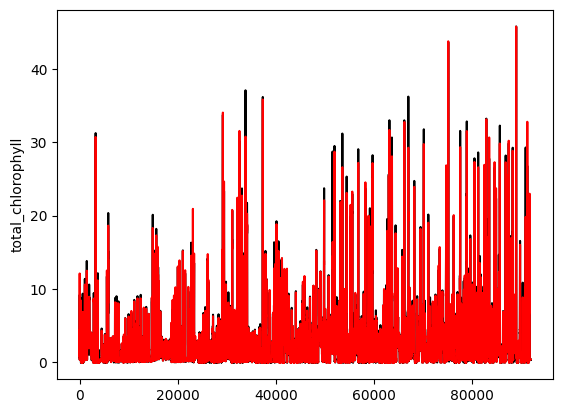

In [9]:
sns.lineplot(y_test, color="black")
sns.lineplot(pred_y_plot, color="red")